In [11]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/user/Desktop/Github/BatiBank_CreditScoring/scripts')
from model_training import load_data, split_data, train_models, tune_hyperparameters, evaluate_model,create_pipeline


In [2]:
# Load dataset
df = load_data('C:/Users/user/Desktop/Github/BatiBank_CreditScoring/data/data.csv')



In [3]:
# Check the columns of the DataFrame
print("Columns in the dataset:", df.columns)


Columns in the dataset: Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')


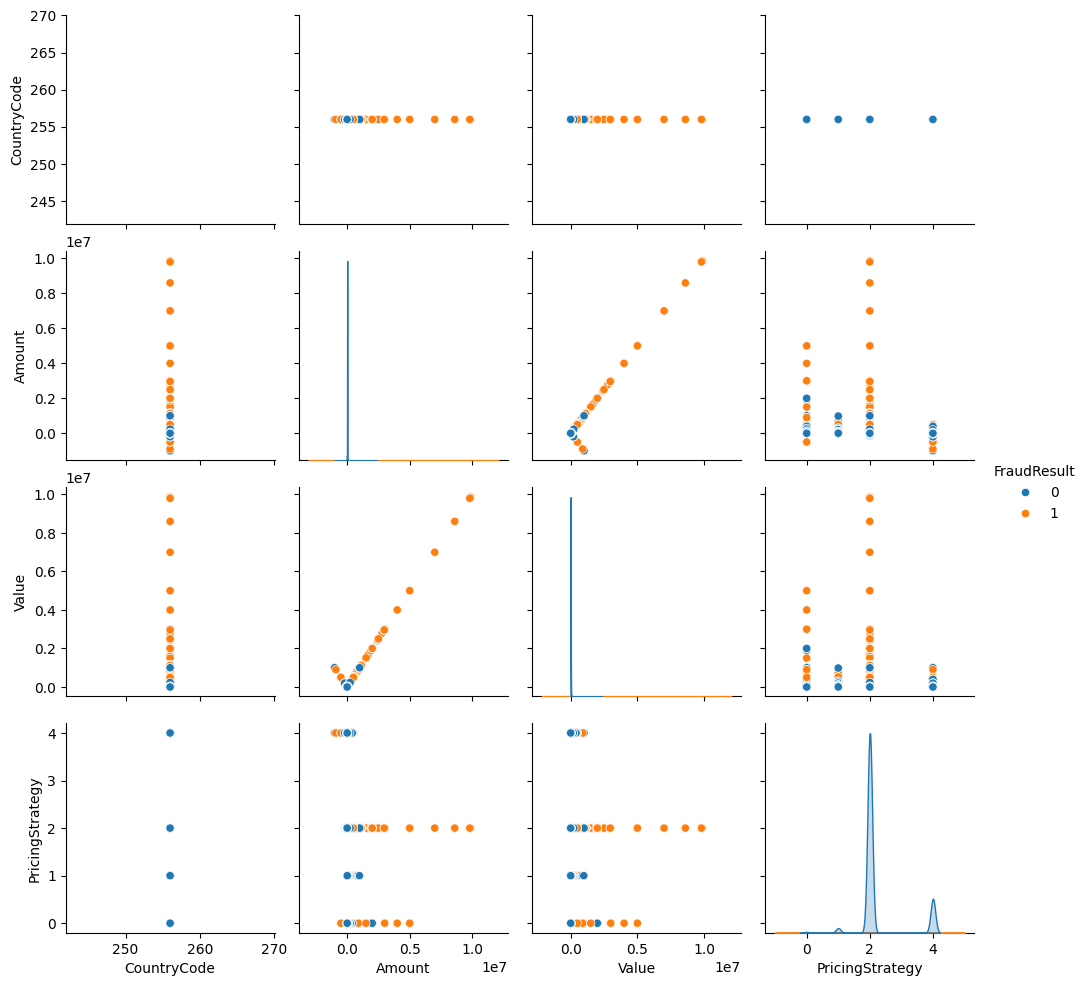

In [4]:

# Use 'FraudResult' as the target variable
target_column = 'FraudResult'  

# Visualize the data (optional)
if target_column in df.columns:
    sns.pairplot(df, hue=target_column)
    plt.show()
else:
    print(f"'{target_column}' column not found in the dataset. Available columns are: {df.columns.tolist()}")

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Split the data
X_train, X_test, y_train, y_test = split_data(df, 'FraudResult')

# Create a pipeline for each model and train
trained_models = {}
for model_name, model in {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}.items():
    pipeline = create_pipeline(model)
    pipeline.fit(X_train, y_train)
    trained_models[model_name] = pipeline

# Tune Hyperparameters for Random Forest using the pipeline
param_grid_rf = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 20]
}
best_rf = tune_hyperparameters(trained_models['Random Forest'], param_grid_rf, X_train, y_train)




ValueError: A given column is not a column of the dataframe

In [ ]:
# Model Evaluation and Visualization
evaluation_results = {}

for model_name, model in trained_models.items():
    metrics = evaluate_model(model, X_test, y_test)
    evaluation_results[model_name] = metrics

# Evaluate tuned Random Forest
evaluation_results['Tuned Random Forest'] = evaluate_model(best_rf, X_test, y_test)

# Create a DataFrame to store evaluation results
metrics_df = pd.DataFrame(evaluation_results).T
metrics_df



In [ ]:
# Plot the evaluation metrics
metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']].plot(kind='bar', figsize=(12, 8))
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.show()
